In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
import pickle
import os
import sys
import copy

pp_path = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
sys.path.append(pp_path)
os.environ["PYTHONPATH"] = pp_path + ":" + os.environ.get("PYTHONPATH", "")
from utils import *
pd.options.mode.chained_assignment = None # None / 'warn'
pd.set_option('display.max_columns', None)

In [2]:
### read dataset

# source: https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones
datapath_tr = '../data_raw/HAR/train.csv'
datapath_te = '../data_raw/HAR/test.csv'
df_tr = pd.read_csv(datapath_tr)
df_te = pd.read_csv(datapath_te)
df = pd.concat([df_tr, df_te], ignore_index=False, copy=False)
num_train = len(df_tr)
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10299 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.3+ MB


In [4]:
# check for missing values

df.isnull().sum().sum()

0

In [5]:
### preprocessing columns

df = df.drop("subject", axis=1)

# assign the column name of the target feature as "Target"
df.rename(columns={"Activity":"Target"}, inplace=True)

# make sure the label ranges from 0 to (num_class-1)
df["Target"] = LabelEncoder().fit_transform(df["Target"])

print('\ndata shape: ', df.shape, sep='')
print('\ncolumn names:\n', list(df.columns), sep='')
print('\nclass distribution:\n', df.Target.value_counts(), sep='')
print('\ncolumn types:\n', df.dtypes, sep='')


data shape: (10299, 562)

column names:
['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z', 'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z', 'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z', 'tBodyAcc-max()-X', 'tBodyAcc-max()-Y', 'tBodyAcc-max()-Z', 'tBodyAcc-min()-X', 'tBodyAcc-min()-Y', 'tBodyAcc-min()-Z', 'tBodyAcc-sma()', 'tBodyAcc-energy()-X', 'tBodyAcc-energy()-Y', 'tBodyAcc-energy()-Z', 'tBodyAcc-iqr()-X', 'tBodyAcc-iqr()-Y', 'tBodyAcc-iqr()-Z', 'tBodyAcc-entropy()-X', 'tBodyAcc-entropy()-Y', 'tBodyAcc-entropy()-Z', 'tBodyAcc-arCoeff()-X,1', 'tBodyAcc-arCoeff()-X,2', 'tBodyAcc-arCoeff()-X,3', 'tBodyAcc-arCoeff()-X,4', 'tBodyAcc-arCoeff()-Y,1', 'tBodyAcc-arCoeff()-Y,2', 'tBodyAcc-arCoeff()-Y,3', 'tBodyAcc-arCoeff()-Y,4', 'tBodyAcc-arCoeff()-Z,1', 'tBodyAcc-arCoeff()-Z,2', 'tBodyAcc-arCoeff()-Z,3', 'tBodyAcc-arCoeff()-Z,4', 'tBodyAcc-correlation()-X,Y', 'tBodyAcc-correlation()-X,Z', 'tBodyAcc-correlation()-Y,Z', 'tGravityAcc-mean()-X', 'tGravityA

In [6]:
df.describe(include='all')

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,tBodyAcc-max()-Y,tBodyAcc-max()-Z,tBodyAcc-min()-X,tBodyAcc-min()-Y,tBodyAcc-min()-Z,tBodyAcc-sma(),tBodyAcc-energy()-X,tBodyAcc-energy()-Y,tBodyAcc-energy()-Z,tBodyAcc-iqr()-X,tBodyAcc-iqr()-Y,tBodyAcc-iqr()-Z,tBodyAcc-entropy()-X,tBodyAcc-entropy()-Y,tBodyAcc-entropy()-Z,"tBodyAcc-arCoeff()-X,1","tBodyAcc-arCoeff()-X,2","tBodyAcc-arCoeff()-X,3","tBodyAcc-arCoeff()-X,4","tBodyAcc-arCoeff()-Y,1","tBodyAcc-arCoeff()-Y,2","tBodyAcc-arCoeff()-Y,3","tBodyAcc-arCoeff()-Y,4","tBodyAcc-arCoeff()-Z,1","tBodyAcc-arCoeff()-Z,2","tBodyAcc-arCoeff()-Z,3","tBodyAcc-arCoeff()-Z,4","tBodyAcc-correlation()-X,Y","tBodyAcc-correlation()-X,Z","tBodyAcc-correlation()-Y,Z",tGravityAcc-mean()-X,tGravityAcc-mean()-Y,tGravityAcc-mean()-Z,tGravityAcc-std()-X,tGravityAcc-std()-Y,tGravityAcc-std()-Z,tGravityAcc-mad()-X,tGravityAcc-mad()-Y,tGravityAcc-mad()-Z,tGravityAcc-max()-X,tGravityAcc-max()-Y,tGravityAcc-max()-Z,tGravityAcc-min()-X,tGravityAcc-min()-Y,tGravityAcc-min()-Z,tGravityAcc-sma(),tGravityAcc-energy()-X,tGravityAcc-energy()-Y,tGravityAcc-energy()-Z,tGravityAcc-iqr()-X,tGravityAcc-iqr()-Y,tGravityAcc-iqr()-Z,tGravityAcc-entropy()-X,tGravityAcc-entropy()-Y,tGravityAcc-entropy()-Z,"tGravityAcc-arCoeff()-X,1","tGravityAcc-arCoeff()-X,2","tGravityAcc-arCoeff()-X,3","tGravityAcc-arCoeff()-X,4","tGravityAcc-arCoeff()-Y,1","tGravityAcc-arCoeff()-Y,2","tGravityAcc-arCoeff()-Y,3","tGravityAcc-arCoeff()-Y,4","tGravityAcc-arCoeff()-Z,1","tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4","tGravityAcc-correlation()-X,Y","tGravityAcc-correlation()-X,Z","tGravityAcc-correlation()-Y,Z",tBodyAccJerk-mean()-X,tBodyAccJerk-mean()-Y,tBodyAccJerk-mean()-Z,tBodyAccJerk-std()-X,tBodyAccJerk-std()-Y,tBodyAccJerk-std()-Z,tBodyAccJerk-mad()-X,tBodyAccJerk-mad()-Y,tBodyAccJerk-mad()-Z,tBodyAccJerk-max()-X,tBodyAccJerk-max()-Y,tBodyAccJerk-max()-Z,tBodyAccJerk-min()-X,tBodyAccJerk-min()-Y,tBodyAccJerk-min()-Z,tBodyAccJerk-sma(),tBodyAccJerk-energy()-X,tBodyAccJerk-energy()-Y,tBodyAccJerk-energy()-Z,tBodyAccJerk-iqr()-X,tBodyAccJerk-iqr()-Y,tBodyAccJerk-iqr()-Z,tBodyAccJerk-entropy()-X,tBodyAccJerk-entropy()-Y,tBodyAccJerk-entropy()-Z,"tBodyAccJerk-arCoeff()-X,1","tBodyAccJerk-arCoeff()-X,2","tBodyAccJerk-arCoeff()-X,3","tBodyAccJerk-arCoeff()-X,4","tBodyAccJerk-arCoeff()-Y,1","tBodyAccJerk-arCoeff()-Y,2","tBodyAccJerk-arCoeff()-Y,3","tBodyAccJerk-arCoeff()-Y,4","tBodyAccJerk-arCoeff()-Z,1","tBodyAccJerk-arCoeff()-Z,2","tBodyAccJerk-arCoeff()-Z,3","tBodyAccJerk-arCoeff()-Z,4","tBodyAccJerk-correlation()-X,Y","tBodyAccJerk-correlation()-X,Z","tBodyAccJerk-correlation()-Y,Z",tBodyGyro-mean()-X,tBodyGyro-mean()-Y,tBodyGyro-mean()-Z,tBodyGyro-std()-X,tBodyGyro-std()-Y,tBodyGyro-std()-Z,tBodyGyro-mad()-X,tBodyGyro-mad()-Y,tBodyGyro-mad()-Z,tBodyGyro-max()-X,tBodyGyro-max()-Y,tBodyGyro-max()-Z,tBodyGyro-min()-X,tBodyGyro-min()-Y,tBodyGyro-min()-Z,tBodyGyro-sma(),tBodyGyro-energy()-X,tBodyGyro-energy()-Y,tBodyGyro-energy()-Z,tBodyGyro-iqr()-X,tBodyGyro-iqr()-Y,tBodyGyro-iqr()-Z,tBodyGyro-entropy()-X,tBodyGyro-entropy()-Y,tBodyGyro-entropy()-Z,"tBodyGyro-arCoeff()-X,1","tBodyGyro-arCoeff()-X,2","tBodyGyro-arCoeff()-X,3","tBodyGyro-arCoeff()-X,4","tBodyGyro-arCoeff()-Y,1","tBodyGyro-arCoeff()-Y,2","tBodyGyro-arCoeff()-Y,3","tBodyGyro-arCoeff()-Y,4","tBodyGyro-arCoeff()-Z,1","tBodyGyro-arCoeff()-Z,2","tBodyGyro-arCoeff()-Z,3","tBodyGyro-arCoeff()-Z,4","tBodyGyro-correlation()-X,Y","tBodyGyro-correlation()-X,Z","tBodyGyro-correlation()-Y,Z",tBodyGyroJerk-mean()-X,tBodyGyroJerk-mean()-Y,tBodyGyroJerk-mean()-Z,tBodyGyroJerk-std()-X,tBodyGyroJerk-std()-Y,tBodyGyroJerk-std()-Z,tBodyGyroJerk-mad()-X,tBodyGyroJerk-mad()-Y,tBodyGyroJerk-mad()-Z,tBodyGyroJerk-max()-X,tBodyGyroJerk-max()-Y,tBodyGyroJerk-max()-Z,tBodyGyroJerk-min()-X,tBodyGyroJerk-min()-Y,tBodyGyroJerk-min()-Z,tBodyGyroJ

In [7]:
# shuffle and split data into train/(val)/test

seed = 0
df_train = shuffle_data(df.iloc[:num_train,:], seed=seed)
df_test = shuffle_data(df.iloc[num_train:,:], seed=seed)

print('train:', df_train.shape)
print(np.unique(df_train.Target, return_counts=True))
print('\ntest:', df_test.shape)
print(np.unique(df_test.Target, return_counts=True))

train: (7352, 562)
(array([0, 1, 2, 3, 4, 5]), array([1407, 1286, 1374, 1226,  986, 1073]))

test: (2947, 562)
(array([0, 1, 2, 3, 4, 5]), array([537, 491, 532, 496, 420, 471]))


In [8]:
# dim reduction
from sklearn.decomposition import PCA

features = list(OrderedSet(df_train.columns.to_list()) - OrderedSet(["Target"]))
scaler_list = [StandardScaler()]   ### StandardScaler() / MinMaxScaler(clip=True)
feature_list = [features]
df_train, df_test = scale_features(df_train, df_test, feature_list, scaler_list)

pca = PCA(n_components=0.9, random_state=seed)
df_train = pd.concat([pd.DataFrame(pca.fit_transform(df_train[features])), df_train["Target"]], axis=1)
df_test = pd.concat([pd.DataFrame(pca.transform(df_test[features])), df_test["Target"]], axis=1)
df_train.rename(columns=lambda c: 'col'+str(c) if isinstance(c, int) else c, inplace=True)
df_test.rename(columns=lambda c: 'col'+str(c) if isinstance(c, int) else c, inplace=True)


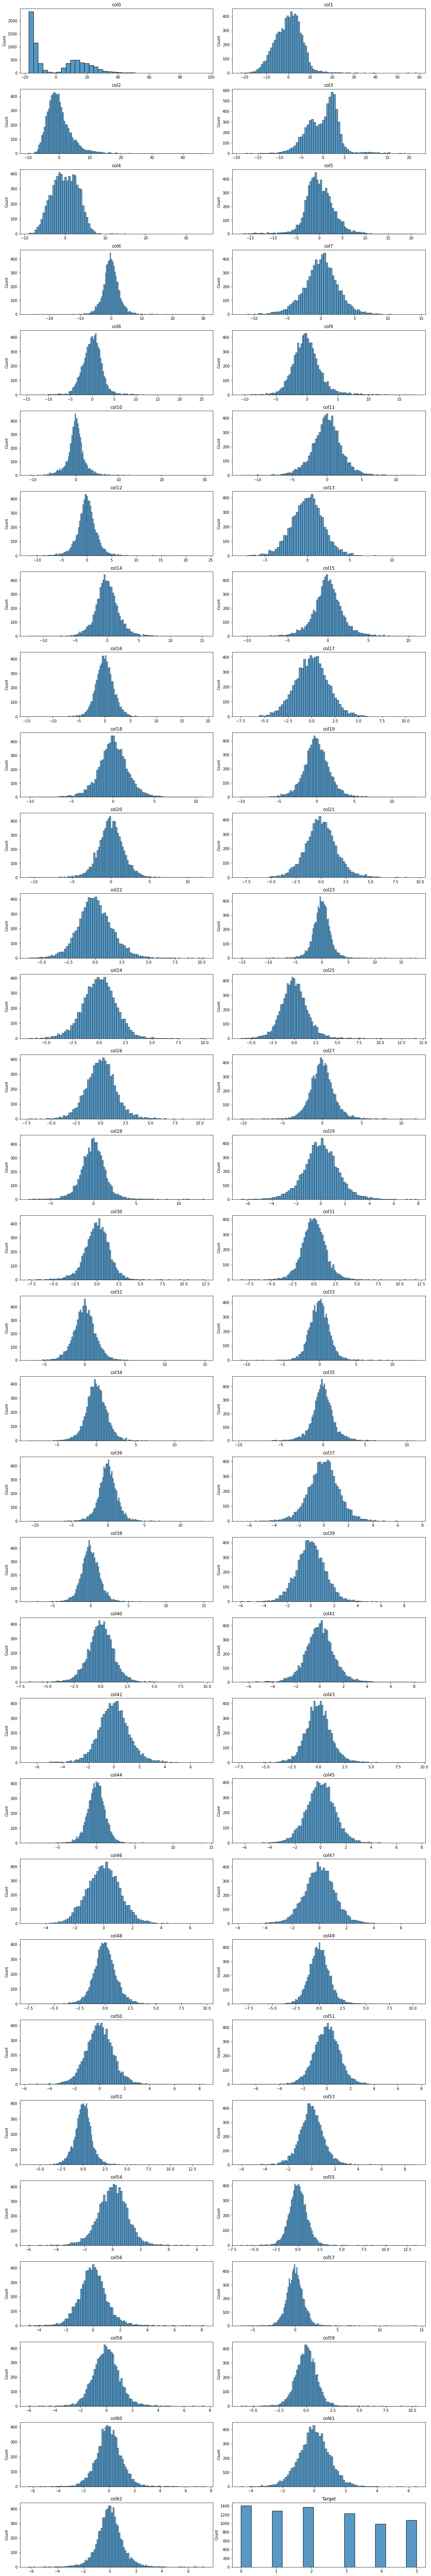

In [9]:
# plot histograms of the training data

ncol, nrow = 2, int(np.ceil(len(df_train.columns)/2))
figsize = (16,3*nrow)

plot_hist(df_train, figsize, nrow, ncol)

In [10]:
# clip outlier values
pd.options.mode.chained_assignment = 'warn' # None / 'warn'

for feature in df_train.columns:
    if feature=="Target":
        continue
    elif feature=='col0':
        lower = np.percentile(df_train[feature], 1)
        upper = np.percentile(df_train[feature], 99)
    else:
        q1 = df_train[feature].quantile(0.25)
        q3 = df_train[feature].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
    
    df_train.loc[df_train[feature]<lower, feature] = lower
    df_train.loc[df_train[feature]>upper, feature] = upper
    df_test.loc[df_test[feature]<lower, feature] = lower
    df_test.loc[df_test[feature]>upper, feature] = upper

In [11]:
categorical_features = [] ###
continuous_features = list(OrderedSet(df_train.columns.to_list()) - OrderedSet(["Target"]) - OrderedSet(categorical_features))
print('continuous_features:', continuous_features)
print('\ncategorical_features:', categorical_features)

continuous_features: ['col0', 'col1', 'col2', 'col3', 'col4', 'col5', 'col6', 'col7', 'col8', 'col9', 'col10', 'col11', 'col12', 'col13', 'col14', 'col15', 'col16', 'col17', 'col18', 'col19', 'col20', 'col21', 'col22', 'col23', 'col24', 'col25', 'col26', 'col27', 'col28', 'col29', 'col30', 'col31', 'col32', 'col33', 'col34', 'col35', 'col36', 'col37', 'col38', 'col39', 'col40', 'col41', 'col42', 'col43', 'col44', 'col45', 'col46', 'col47', 'col48', 'col49', 'col50', 'col51', 'col52', 'col53', 'col54', 'col55', 'col56', 'col57', 'col58', 'col59', 'col60', 'col61', 'col62']

categorical_features: []


In [12]:
# scaling

scaler_list = [MinMaxScaler(clip=True), MinMaxScaler(clip=True)]   ### StandardScaler() / MinMaxScaler(clip=True)
feature_list = [continuous_features, categorical_features]
df_train_scaled, df_test_scaled = scale_features(df_train, df_test, feature_list, scaler_list)

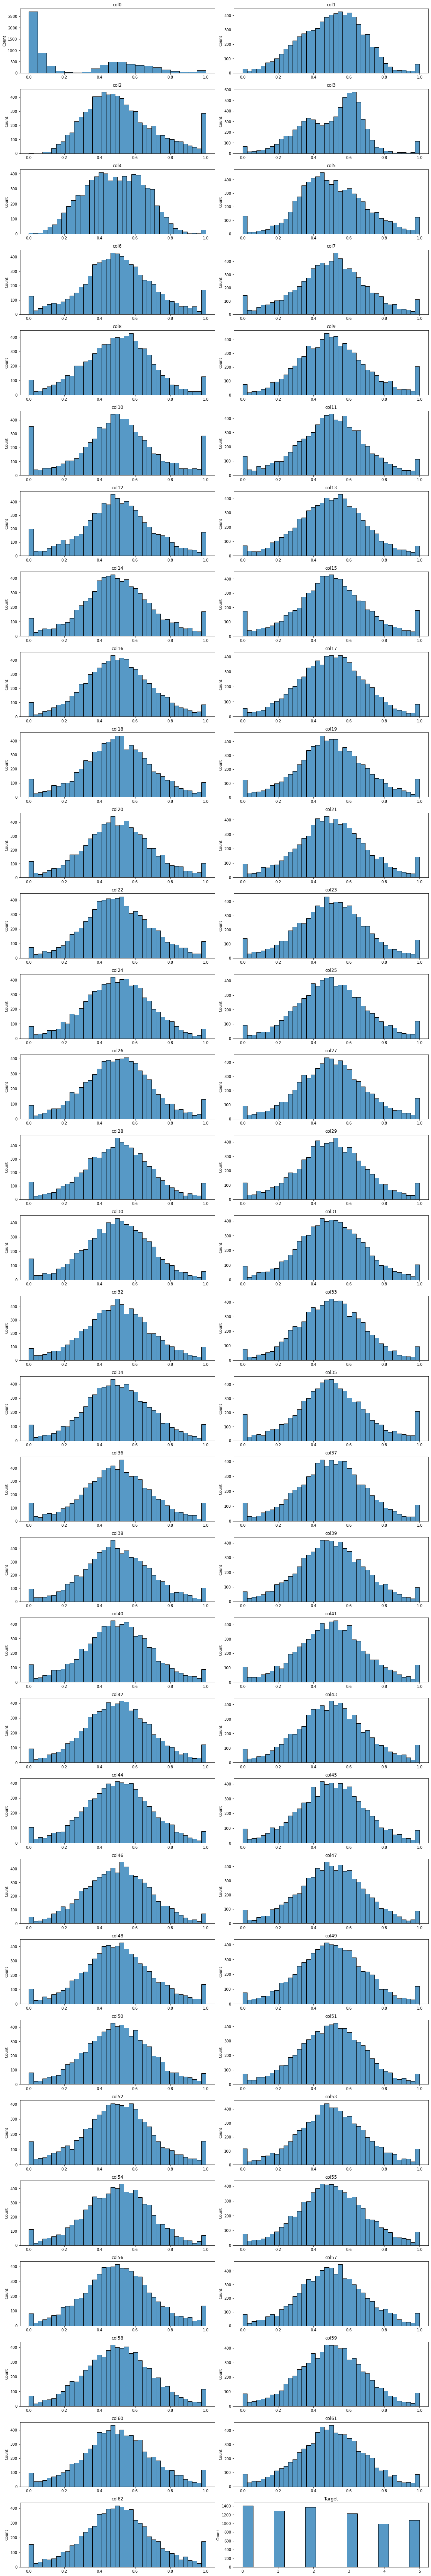

In [13]:
plot_hist(df_train_scaled, figsize, nrow, ncol)

In [14]:
df_train_scaled

,col0,col1,col2,col3,col4,col5,col6,col7,col8,col9,col10,col11,col12,col13,col14,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24,col25,col26,col27,col28,col29,col30,col31,col32,col33,col34,col35,col36,col37,col38,col39,col40,col41,col42,col43,col44,col45,col46,col47,col48,col49,col50,col51,col52,col53,col54,col55,col56,col57,col58,col59,col60,col61,col62,Target
0,0.024185,0.602514,0.605702,0.368645,0.385059,0.437623,0.409287,0.471754,0.434635,0.400690,0.551686,0.393852,0.347727,0.424147,0.316220,0.428526,0.544279,0.724338,0.481798,0.402663,0.511229,0.302515,0.201453,0.608584,0.704927,0.550499,0.688205,0.557123,0.472347,0.695525,0.584511,0.465908,0.806835,0.723027,0.365227,0.584748,0.670857,0.785535,0.728899,0.542547,0.707938,0.305754,0.490437,0.833299,0.285046,0.507345,0.616103,0.244753,0.759247,0.503729,0.285630,0.528419,0.409480,0.115852,0.114324,0.512106,0.771842,0.364200,0.538448,0.347025,0.014154,0.449820,0.568215,0
1,0.060341,0.429720,0.428039,0.671969,0.726854,0.671422,0.454364,0.556701,0.589984,0.672400,0.376995,0.352260,0.557019,0.461723,0.707945,0.408593,0.583685,0.356324,0.705980,0.579787,0.541934,0.670150,0.305802,0.512455,0.378157,0.644898,0.542314,0.565496,0.412351,0.635751,0.607767,0.388561,0.474608,0.475682,0.652789,0.524738,0.729111,0.653146,0.547400,0.373690,0.426600,0.491813,0.481830,0.554599,0.608768,0.564434,0.514124,0.223395,0.399254,0.626920,0.422827,0.426259,0.303268,0.331490,0.365061,0.623228,0.896600,0.593038,0.510006,0.174847,0.405873,0.423465,0.572948,2
2,0.746875,0.501182,0.554733,0.365895,0.552328,0.477880,0.781712,0.802665,0.430204,0.174319,0.724650,0.453621,0.448520,0.612035,0.512766,0.884137,0.457115,0.649459,0.708147,0.259419,0.189602,0.269666,0.283848,0.000000,0.939089,0.707748,0.786826,0.289717,0.438791,0.353064,0.126713,0.365159,0.244065,0.187062,0.477363,0.885224,0.811708,0.702408,0.636348,0.252802,0.790302,0.348794,0.538166,0.593868,0.465398,0.712945,0.445518,0.581982,0.339040,0.550868,0.856065,0.000000,1.000000,0.975960,0.232147,0.857158,0.676823,0.156045,0.493072,0.978084,0.238472,0.744772,0.271183,4
3,0.063562,0.372027,0.502976,0.632147,0.770512,0.739019,0.276619,0.598826,0.371673,0.653975,0.435663,0.190982,0.644565,0.104900,0.508660,0.667922,0.378444,0.412474,0.600703,0.394584,0.696136,0.703004,0.560879,0.423770,0.497672,0.492816,0.306129,0.696631,0.459304,0.550812,0.259277,0.502333,0.494084,0.553387,0.407106,0.646306,0.500627,0.270392,0.330644,0.388408,0.256890,0.658270,0.488811,0.302708,0.823712,0.642314,0.487481,0.510040,0.609547,0.421148,0.151048,0.375019,0.390406,0.368326,0.459744,0.497745,0.777119,0.433431,0.244574,0.509838,0.612414,0.537849,0.317813,2
4,0.060531,0.385164,0.699629,0.506843,0.615997,0.547695,0.304478,0.583486,0.342011,0.633895,0.719969,0.237816,0.695224,0.032793,0.244137,0.264985,0.065901,0.405634,0.363508,0.208410,0.376337,0.425685,0.650640,0.231409,0.717801,0.180101,0.268973,0.337471,0.690937,0.636367,0.274393,0.765441,0.716043,0.372644,0.880294,0.818642,0.651658,0.405988,0.274212,0.710251,0.516529,0.580133,0.676852,0.339458,0.433347,0.631404,0.273200,0.934041,0.595213,0.337639,0.614181,0.102349,0.330040,0.426893,0.922862,0.766003,0.517957,0.854774,0.476742,0.302374,0.485283,0.152019,0.431152,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.094001,0.328532,0.522053,0.623518,0.677226,0.606132,0.342567,0.718268,0.389977,0.655251,0.589669,0.479521,0.517013,0.605666,0.582452,0.727293,0.386558,0.156991,0.489312,0.243765,0.382826,0.509048,0.736939,0.698235,0.449402,0.523271,0.551222,0.672420,0.249049,0.443157,0.115306,0.516571,0.392184,0.450510,0.249693,0.470045,0.482346,0.353563,0.600760,0.274831,0.426447,0.838152,0.182729,0.307781,0.556963,0.434961,0.321285,0.720169,0.664229,0.554726,0.629677,0.352445,0.749627,0.283770,0.378171,0.267621,